# ***Project work on Painter style recognition, Group 29***
## **Dataset splitting and balancing**

Salvatore Grimaldi	0622701742	s.grimaldi29@studenti.unisa.it

Enrico Maria Di Mauro	0622701706	e.dimauro5@studenti.unisa.it

Allegra Cuzzocrea 	0622701707	a.cuzzocrea2@studenti.unisa.it

Andrea De Gruttola	0622701880	a.degruttola@studenti.unisa.it




In [ ]:
#useful imports
from google.colab import drive
import os
import matplotlib.pyplot as plt
import PIL.Image
import shutil
import random

In [ ]:
# mounting drive and changing path
drive.mount('/content/drive')
%cd drive/MyDrive/29/data/

# path check
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1WkiM1CV9ZMwqVumq0o0qMEeIP4UMqwK-/29/data
/content/drive/.shortcut-targets-by-id/1WkiM1CV9ZMwqVumq0o0qMEeIP4UMqwK-/29/data


# Dataset images examples

In [ ]:
# folders containing samples found online ("handmade" and crawler)
caravaggio_source_main = 'full/CARAVAGGIO'
manet_source_main = 'full/MANET'
vangogh_source_main = 'full/VANGOGH'

# folders containing canva samples
caravaggio_source_canva = 'full/CARAVAGGIO_CANVA'
manet_source_canva = 'full/MANET_CANVA'
vangogh_source_canva = 'full/VANGOGH_CANVA'

# folders ready to contain training samples 
caravaggio_train = 'train/caravaggio'
manet_train = 'train/manet'
vangogh_train = 'train/vangogh'

# folders ready to contain validation samples
caravaggio_val = 'val/caravaggio'
manet_val = 'val/manet'
vangogh_val = 'val/vangogh'

# list of all folders containing samples found online ("handmade" and crawler)
directories = [caravaggio_source_main, manet_source_main, vangogh_source_main]

# list of all folders containing canva samples
directories_canva = [caravaggio_source_canva, manet_source_canva, vangogh_source_canva]

# list of all folders ready to contain training and validation samples
destinations = [caravaggio_train, caravaggio_val, manet_train, manet_val, vangogh_train, vangogh_val]

In [ ]:
# printing number of images of every sub-folder in folder data/full
full_data_dir = 'full/'

for sub in os.listdir(full_data_dir):
  if os.path.isdir(full_data_dir + sub):
    print(sub + ' has ' + str(len([entry for entry in os.listdir(full_data_dir + sub) if os.path.isfile(os.path.join(full_data_dir + sub, entry))])) + ' items')

CARAVAGGIO_CANVA has 56 items 
MANET_CANVA has 56 items 
VANGOGH_CANVA has 56 items 
CARAVAGGIO has 1749 items 
MANET has 2318 items 
VANGOGH has 4536 items 


In [ ]:
#printing some samples from the chosen folder
folder = 'VANGOGH/' # folder of which you want to visualize samples
limit = len([entry for entry in os.listdir(full_data_dir + sub) if os.path.isfile(os.path.join(full_data_dir + sub, entry))])

list_images = []
for filename in os.listdir(full_data_dir + folder):
  list_images.append(filename)

print(list_images)

['VANGOGH_616.jpg', 'VANGOGH_2479.jpg', 'VANGOGH_2998.jpg', 'VANGOGH_4424.jpg', 'VANGOGH_84.jpg', 'VANGOGH_2339.jpg', 'VANGOGH_2505.jpg', 'VANGOGH_2483.jpg', 'VANGOGH_1961.jpg', 'VANGOGH_413.jpg', 'VANGOGH_2369.jpg', 'VANGOGH_1530.jpg', 'VANGOGH_4374.jpg', 'VANGOGH_3507.jpg', 'VANGOGH_1358.jpg', 'VANGOGH_2718.jpg', 'VANGOGH_2012.jpg', 'VANGOGH_2350.jpg', 'VANGOGH_279.jpg', 'VANGOGH_2420.jpg', 'VANGOGH_3154.jpg', 'VANGOGH_870.jpg', 'VANGOGH_1485.jpg', 'VANGOGH_2115.jpg', 'VANGOGH_3658.jpg', 'VANGOGH_1718.jpg', 'VANGOGH_4145.jpg', 'VANGOGH_1488.jpg', 'VANGOGH_3723.jpg', 'VANGOGH_1997.jpg', 'VANGOGH_3758.jpg', 'VANGOGH_676.jpg', 'VANGOGH_2561.jpg', 'VANGOGH_4118.jpg', 'VANGOGH_721.jpg', 'VANGOGH_1740.jpg', 'VANGOGH_4006.jpg', 'VANGOGH_4232.jpg', 'VANGOGH_4028.jpg', 'VANGOGH_4400.jpg', 'VANGOGH_1747.jpg', 'VANGOGH_1143.jpg', 'VANGOGH_358.jpg', 'VANGOGH_2989.jpg', 'VANGOGH_3225.jpg', 'VANGOGH_2581.jpg', 'VANGOGH_2253.jpg', 'VANGOGH_2149.jpg', 'VANGOGH_792.jpg', 'VANGOGH_3873.jpg', 'VANGOGH_

In [ ]:
i = 0  # initializing index  

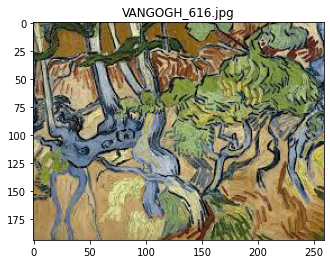

In [ ]:
if(i < limit):
  plt.imshow(PIL.Image.open(full_data_dir + folder + str(list_images[i])))
  plt.title(list_images[i])
  i = i + 1  # incrementing index
else:
  print("You have scrolled through all the photos: re-initialize i = 0 if you want to see them again")

# Information
All the scripts below are useful only if you want to create new training and validation sets.

**DO NOT** run them if you want to test the network using training and validation sets used from us for training and evaluating performances.


In [ ]:
# resetting train and val folders
if os.path.exists('train'):
  shutil.rmtree('train')
os.mkdir('train')
if os.path.exists('val'):
  shutil.rmtree('val')
os.mkdir('val')
for sub in destinations:
  os.mkdir(sub)

## **Splitting**

In [ ]:
def split_data(directories, destinations, val_perc, num_classes):
  """
  Splits data kept in 'directories' among 'destinations' according to 'val_perc'
  Arguments:
      directories: a list of folders, each of which containing samples of a
                   specific class
      destinations: a list of folders. In particular two folders (one for train
                    and the other for val) per class must be provided
      val_perc: an integer between 0 and 100, which represents the percentage of
                less numerous class that must be assigned to the validation set.
                The number of samples belonging to the other classes to assign
                to the validation set is equal to the number obtained from the
                percentage
      num_classes: the number of classes of the classification problem to deal
                   with
  """

  if(val_perc < 0 or val_perc > 100):
    raise Exception('val_perc must be between 0 and 100')


  num_samples = [0] * num_classes
  train_num = [0] * num_classes
  i = 0
  
  # computing number of samples for each class
  for directory in directories:
    num_samples[i] = len([entry for entry in os.listdir(directory) if os.path.isfile(os.path.join(directory, entry))])
    i=i+1

  # computing number of samples for validation and training sets for each class
  min_num = min(num_samples)
  val_num = (min_num * val_perc) // 100
  for i in range(num_classes):
    train_num[i] = num_samples[i] - val_num

  i = 0

  # offset for traversing destinations folders assigned to different classes
  dest_offset = 0

  # populating validation and training sets for each class
  for directory in directories:
    count_train = 0
    count_val = 0
    random.seed(1)
    for filename in os.listdir(directory):
      f = os.path.join(directory, filename)
      if os.path.isfile(f):
        if(count_train < train_num[i] and count_val < val_num):
          rand_num = random.randint(0,1)
          if(rand_num == 0):
            shutil.copy(f, destinations[dest_offset])
            count_train = count_train + 1
          else:
            shutil.copy(f, destinations[dest_offset+1])
            count_val = count_val + 1
        else:
          if(count_train == train_num[i]):
              shutil.copy(f, destinations[dest_offset+1])
              count_val = count_val + 1
          else:
              shutil.copy(f, destinations[dest_offset])
              count_train = count_train + 1
    i = i + 1
    dest_offset = dest_offset + 2

In [ ]:
split_data(directories, destinations, 20, 3)  # calling split_data on folders containing samples found online
split_data(directories_canva, destinations, 20, 3)  # calling split_data on folders containing canva samples

# printing number of images contained in useful folders
for sub in directories:
  print(sub + " has " + str(len([entry for entry in os.listdir(sub) if os.path.isfile(os.path.join(sub, entry))])) + " items")
print('\n')
for sub in directories_canva:
  print(sub + " has " + str(len([entry for entry in os.listdir(sub) if os.path.isfile(os.path.join(sub, entry))])) + " items")
print('\n')
for sub in destinations:
  print(sub + " has " + str(len([entry for entry in os.listdir(sub) if os.path.isfile(os.path.join(sub, entry))])) + " items")

full/CARAVAGGIO has 1749 items
full/MANET has 2318 items
full/VANGOGH has 4536 items


full/CARAVAGGIO_CANVA has 56 items
full/MANET_CANVA has 56 items
full/VANGOGH_CANVA has 56 items


train/caravaggio has 1445 items
val/caravaggio has 360 items
train/manet has 2014 items
val/manet has 360 items
train/vangogh has 4232 items
val/vangogh has 360 items


## **Balancing**

In [ ]:
# The purpose of this script is classes balancing before starting network training
def balancer(directories, destinations, num_classes):
  """
  Balances data kept in 'directories' saving new samples in 'destinations'
  (directories and destinations can also be the same).
  The classification problem to deal with is characterized by 'num_classes'
  classes. After calling this function, the number of samples available for
  each class is exactly the same.
  Arguments:
      directories: a list of folders, each of which containing samples of a
                   specific class
      destinations: a list of folders, one for each class, meant to contain
                    new samples, which are actually copies of available samples.
                    If directories and destinations are the same, destinations
                    of course contains also original samples
      num_classes: the number of classes of the classification problem to deal
                   with
  """

  # finding most numerous class
  num_samples = [0] * num_classes
  spreads = [0] * num_classes
  i=0

  # computing number of samples for each class
  for directory in directories:
    num_samples[i] = len([entry for entry in os.listdir(directory) if os.path.isfile(os.path.join(directory, entry))])
    i=i+1

  target_num = max(num_samples)

  print(num_samples)
  print(target_num)

  for i in range(num_classes):
    spreads[i] = target_num - num_samples[i]

  print(spreads)

  # oversampling
  for i in range(num_classes):
    counter = 0
    while(counter < spreads[i]):
      for filename in os.listdir(directories[i])[:spreads[i]-counter]:
        base, extension = os.path.splitext(filename)
        shutil.copy(directories[i] + '/' + filename, destinations[i] + '/' + base + "_copy" + str(counter) + extension)
        counter = counter + 1

In [ ]:
# list of all folders containing train samples
directories = [caravaggio_train, manet_train, vangogh_train]

balancer(directories, directories, 3)  # calling balancer on folders containing train samples

# printing number of images of every folder containing train samples
for sub in directories:
  print(sub + " has " + str(len([entry for entry in os.listdir(sub) if os.path.isfile(os.path.join(sub, entry))])) + " items")

train/caravaggio has 4232 items
train/manet has 4232 items
train/vangogh has 4232 items
